In [1]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Gain Intuitions by Solving 2 Ancestry problem

To begin to understand exact and numerical approaches to the optimization problem of interest to the Hendricks group for the Hidden Ancestries project, in this notebook we attempt to solve the following constrained, quadratic optimization problem:

$$\min_{\pi \in \mathbb{R}^2} f(x,y)=\sum_{i=1}^{N}(a_i\pi_1+b_i\pi_2-c_i)^2$$

$$\text{subject to:} \quad \pi_1+\pi_2=1 \quad \pi_1\geq 0 \quad \pi_2 \geq 0,$$

where $a_i,b_i,c_i \in \mathbb{R}, i=1,\ldots N$ are quantities obtained from a genetics simulation. The $a_i$'s correspond to the observed allele frequency in ancestry 1; the $b_i$'s correspond to the observed allele frequency in ancestry 2; the $c_i$'s corespond to the observed  total allele frequency in the population. Here, $N$ is the number of SNPs.

In [7]:
# Simulate 10^6 SNPS

# Megan : this is where you will replace the a, b, and c vectors I form with random draws
#         with the data from the SNPS. They should be column vectors!

M=1000000

a = np.random.uniform(low=0, high=0.6, size=(M,1))
b = np.random.uniform(low=0.2, high=0.5, size=(M,1))
c = 0.4*a + 0.6*b

In [8]:
# This is the objective function!

def function(x):
    return np.sum((a*x[0]+b*x[1]-c)**2,axis=0)

In [9]:
# This is a feasible initial point since its components add to 1 and are positive.

x_t=np.array((0.3,0.7))

# Make sure function works by computing f(x_t)

print(function(x_t))

[400.18515994]


In [10]:
# Here is the gradient of the objective function



def gradfun(x):
    return np.array((np.sum(2*a*(a*x[0]+b*x[1]-c),axis=0),np.sum(2*b*(a*x[0]+b*x[1]-c),axis=0)))

In [11]:
print(gradfun(x_t))

[[-3011.86916023]
 [ 4991.83403854]]


## Analytic Solution (2 Ancestries, 1 SNP)

For two ancestries, one SNP, we have an analytic solution given by

$$x^*=\left(\frac{c-b}{a-b},\frac{a-c}{a-b}\right).$$

For $N>1$, this is inapplicable!!!

In [12]:
# Don't print this if N>1

# print((c-b)/(a-b),(a-c)/(a-b))
# function(((c-b)/(a-b),(a-c)/(a-b)))

In [13]:
# Don't print this if N>1

# print(gradfun(((c-b)/(a-b),(a-c)/(a-b))))

## Grid Searching

In [14]:
x=np.arange(0,1,0.01)
y=1-x

In [15]:
import timeit

start = timeit.default_timer()

f=0
f_hist=np.array(f)

for i in range(1,100):
    f= function((x[i],y[i]))
    f_hist=np.vstack((f_hist,f))

f_hist=f_hist[1:]
#print(f_hist)
ind=np.argmin(f_hist)
print(x[ind],y[ind])


stop = timeit.default_timer()

print('Time: ', stop - start)

0.39 0.61
Time:  3.9338950996649573


## SLSQP

In [16]:
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] -1},
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]})

bnds = ((0, None), (0, None))

In [17]:
start = timeit.default_timer()

print(scipy.optimize.minimize(function, x_t, method='SLSQP', bounds=bnds, constraints=cons))

stop = timeit.default_timer()

print('Time: ', stop - start)

     fun: 8.841245102174121e-14
     jac: array([0.00183503, 0.00186359])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.4, 0.6])
Time:  0.40615188129097746


## Visualizations

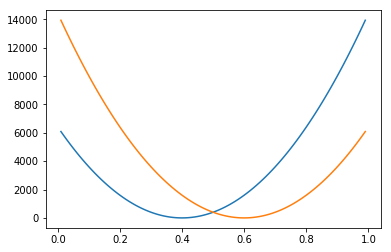

In [18]:
plt.plot(x[1:],f_hist)
plt.plot(y[1:],f_hist)